In [11]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

location_data = read.table(file = '../../data/nCoV2019/for_use/geographic_date.tsv', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(location_data))) {
    location_data[,i] <- as.logical(location_data[,i])
}

# Adjust names
names(location_data) <- gsub("X", "", names(location_data), fixed=TRUE)
names(location_data) <- gsub(".", "-", names(location_data), fixed=TRUE)

head(location_data)

,01-02-2020,01-03-2020,02-02-2020,02-03-2020,03-02-2020,03-03-2020,04-02-2020,04-03-2020,05-02-2020,05-03-2020,⋯,27-02-2020,27-03-2020,28-01-2020,28-02-2020,28-03-2020,29-01-2020,29-02-2020,29-03-2020,30-01-2020,31-01-2020
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
"Aa en Hunze, Drenthe, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalsmeer, North Holland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalten, Gelderland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abbeville County, South Carolina, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abu Dhabi, Abu Dhabi, United Arab Emirates",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Acadia Parish, Louisiana, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [2]:
location_data_transactions <- as(location_data, "transactions")
summary(location_data_transactions)

transactions as itemMatrix in sparse format with
 1615 rows (elements/itemsets/transactions) and
 72 columns (items) and a density of 0.0629085 

most frequent items:
24-03-2020 22-03-2020 23-03-2020 21-03-2020 20-03-2020    (Other) 
       554        504        476        458        426       4897 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
446 229 170 177 131 104  87  41  33  26  35  24  25  22  20  15  11   3   4   2 
 21  23  24 
  7   2   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.529   6.000  24.000 

includes extended item information - examples:
      labels  variables levels
1 01-02-2020 01-02-2020   TRUE
2 01-03-2020 01-03-2020   TRUE
3 02-02-2020 02-02-2020   TRUE

includes extended transaction information - examples:
                         transactionID
1    Aa en Hunze, Drenthe, Netherlands
2 Aalsmeer, North Holland, Netherlands
3      Aal

In [3]:
f <- itemFrequency(location_data_transactions)
summary(f)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0006192 0.0095975 0.0337461 0.0629085 0.0718266 0.3430341 

pdf 
  3

png 
  2

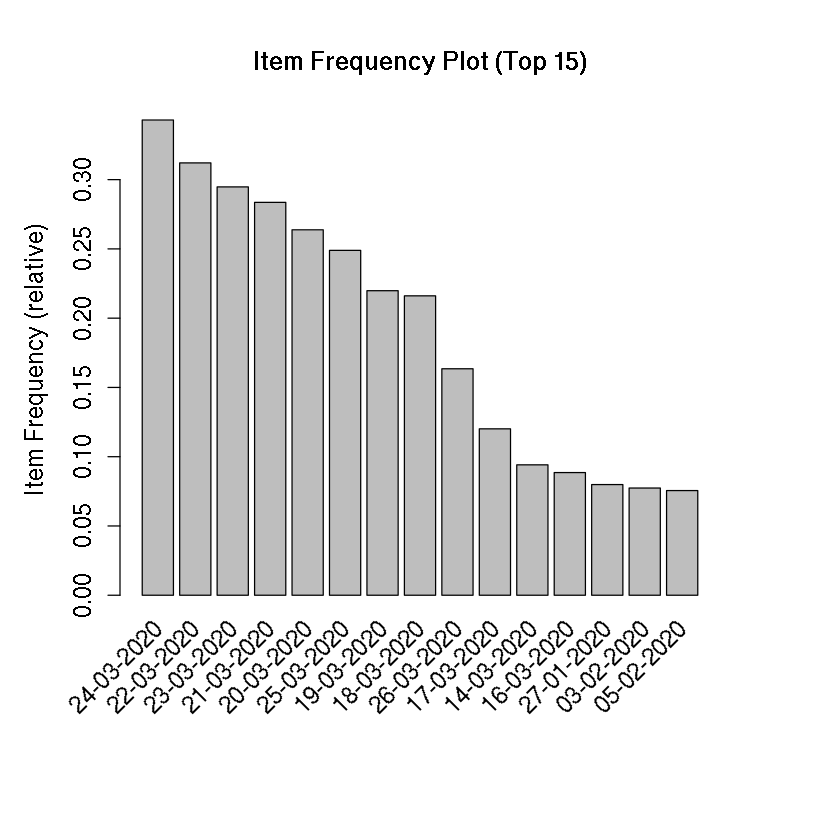

In [4]:
arules::itemFrequencyPlot(items(location_data_transactions),
    topN=15,
    cex.axis=1.3,
    cex.names=1.3,
    cex.lab=1.3,
    cex.main=1.3,
    main='Item Frequency Plot (Top 15)',
    type="relative",
    ylab="Item Frequency (relative)",
    names=TRUE,
    mai=c(2,1,1,1))
dev.copy(pdf, "geo-date-item-frequency.pdf")
dev.off()

# Generate rules

In [5]:
location_rules <- apriori(location_data_transactions, parameter=list(support=0.099, confidence=0.7))
location_rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.099      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 159 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 1615 transaction(s)] done [0.00s].
sorting and recoding items ... [10 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [41 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 41 rules 

Itemsets in Antecedent (LHS)
 [1] "{26-03-2020}"                       "{19-03-2020,20-03-2020}"           
 [3] "{22-03-2020,23-03-2020,24-03-2020}" "{19-03-2020,22-03-2020}"           
 [5] "{20-03-2020,22-03-2020,24-03-2020}" "{20-03-2020,23-03-2020,24-03-2020}"
 [7] "{19-03-2020,24-03-2020}"            "{18-03-2020,23-03-2020}"           
 [9] "{21-03-2020,23-03-2020}"            "{18-03-2020,22-03-2020}"           
[11] "{18-03-2020,24-03-2020}"            "{21-03-2020,22-03-2020}"           
[13] "{19-03-2020,23-03-2020}"            "{20-03-2020,24-03-2020}"           
[15] "{19-03-2020,21-03-2020}"            "{23-03-2020,24-03-2020}"           
[17] "{22-03-2020,24-03-2020}"            "{20-03-2020,22-03-2020}"           
[19] "{20-03-2020,23-03-2020}"            "{20-03-2020,21-03-2020}"           
[21] "{20-03-2020,22-03-2020,23-03-2020}" "{22-03-2020,23-03-2020}"           
Itemsets in Consequent (RHS)
[1] "{24-03-2020}" "{22-03-2020}" "{23-03-2020}" "{20-03-2020}" "{21-03-2

pdf 
  3

png 
  2

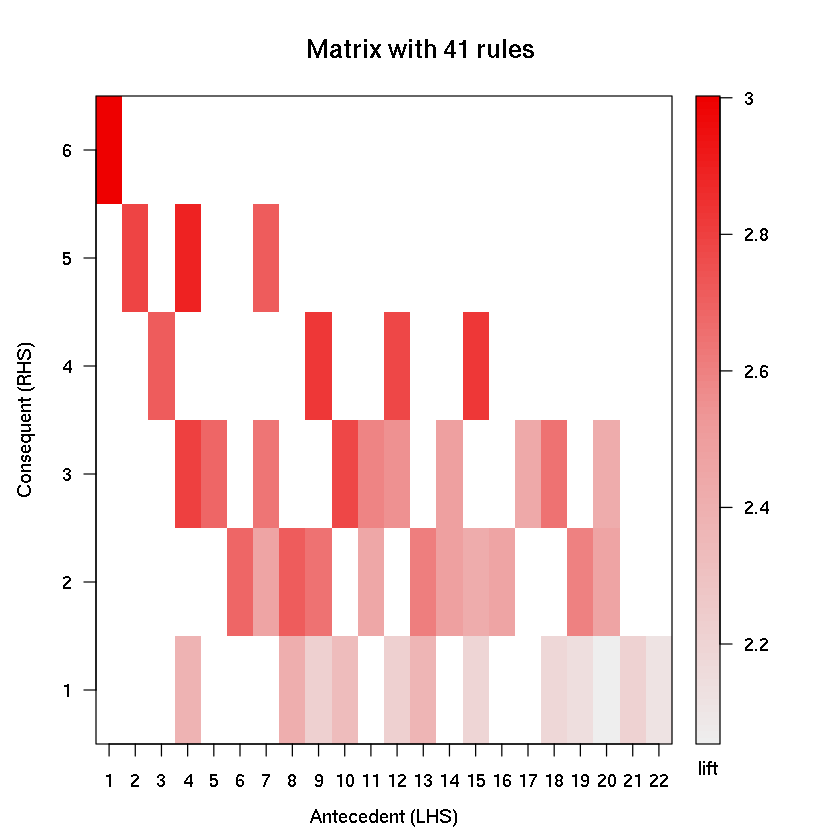

In [6]:
plot(location_rules, method="matrix", measure="lift")
dev.copy(pdf, "geo-date-matrix.pdf")
dev.off()

pdf 
  3

png 
  2

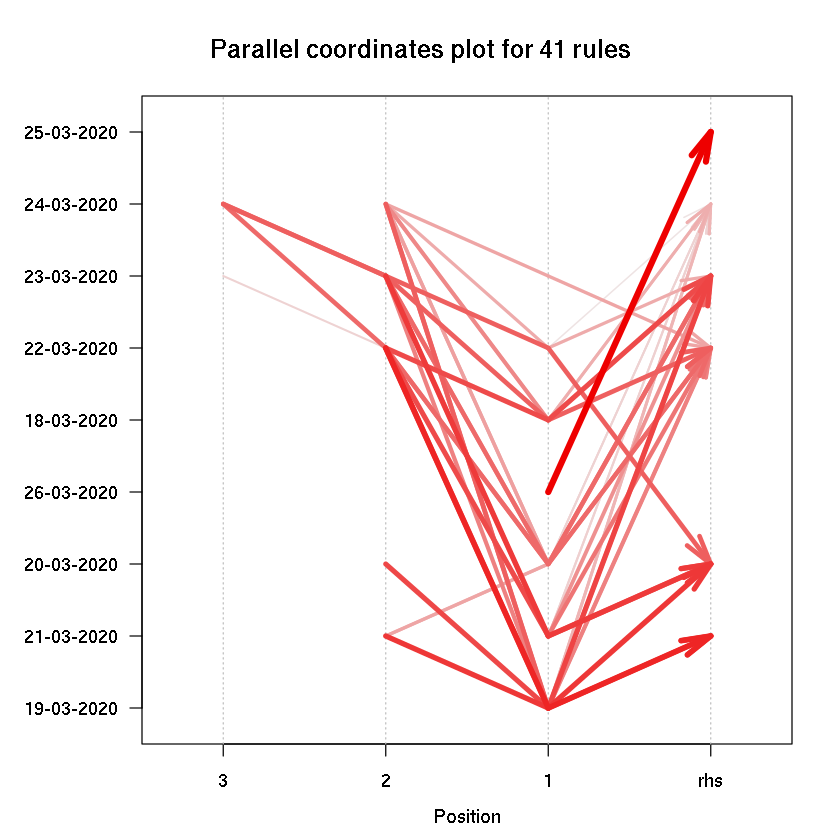

In [7]:
plot(location_rules, method="paracoord", control=list(reorder=TRUE), measure="lift")
dev.copy(pdf, "geo-date-paracoord.pdf")
dev.off()

# Graph rules

pdf 
  3

png 
  2

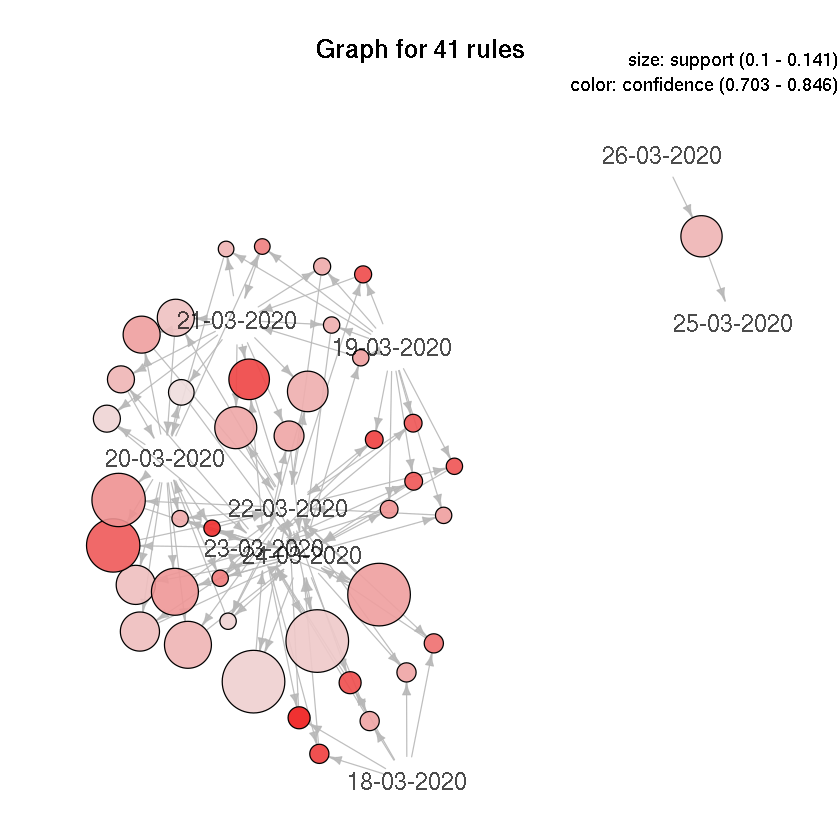

In [20]:
set.seed(14)
plot(location_rules, method="graph", cex=1.3, measure="support", shading="confidence", alpha=0.9)
dev.copy(pdf, "geo-date-rules.pdf")
dev.off()

# Interactive viz

## Confidence

In [9]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="confidence", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-date-rules-confidence.html", title="Rules generated from COVID-19 Dates divided up by Geographic region",
                        selfcontained = TRUE)

## Lift

In [10]:
set.seed(11)
p <- plot(location_rules, method="graph", measure="support", shading="lift", engine="htmlwidget")
htmlwidgets::saveWidget(p, "geo-date-rules-lift.html", title="Rules generated from COVID-19 Dates divided up by Geographic region",
                        selfcontained = TRUE)